=================================================

Judul : Analisis Kinerja dan Trend Game di Platform Steam Tahun 2024

=================================================

# i. Problem Statement dan Dataset Description

## a. Latar belakang

Platform Steam merupakan ekosistem gaming terbesar dan paling populer dibandingkan dengan berbagai platform lainnya, seperti EA Play, XBOX App, Ubisoft Connect, Epic Games Launcher, GOG, dan lainnya. Dengan lebih dari 120 juta pengguna aktif bulanan (Monthly Active Users/MAU) pada tahun 2023, seperti yang diklaim dalam Steamworks Documentation oleh Valve (2023), Steam memiliki jangkauan yang jauh lebih luas dibandingkan kompetitornya. Sebagai perbandingan, Epic Games Store (EGS), berdasarkan Epic Games Annual Report 2023, hanya mencatatkan 68 juta pengguna aktif bulanan, menunjukkan bahwa Steam masih menjadi pilihan utama bagi gamer serta developer yang ingin menjangkau audiens yang lebih besar.

Melihat dominasi Steam serta pertumbuhan industri gaming yang terus berkembang, penting untuk memahami tren gaming di tahun 2024 guna memberikan wawasan bagi para pengembang, baik indie maupun AAA (Triple A), yang ingin merancang game sesuai dengan preferensi pasar. Sebagai seorang Consultant Data Analyst yang berfokus pada Gaming Market, penelitian ini bertujuan untuk mengidentifikasi pola konsumsi pemain, popularitas genre, serta faktor-faktor lain yang dapat membantu developer membuat keputusan strategis. Dengan analisis berbasis data yang kuat, saya dapat memberikan insight yang relevan agar para developer dapat mengoptimalkan strategi mereka dalam menghadirkan produk yang sesuai dengan permintaan pasar.





## b. Problem Statement

Disinilah saya memulai membuat rangakaian berpikir dengan 5W+1H untuk nantinya tau kira kira apa apa saja yang ingin dianalisa statistknya dari dataset yang sudah saya punya:


### 1. **What (Apa yang dianalisis?)**  
- Tren pasar game Steam 2024 dengan fokus pada:  
  - Pola rilis game oleh publisher (frekuensi, klasifikasi Indie/AAA/AA)  
  - Strategi penetapan harga (gratis vs berbayar, segmentasi harga)  
  - Model monetisasi (premium, microtransaction, hybrid)  
  - Hubungan statistik antara variabel komersial (harga vs pendapatan, rating vs penjualan, dll.)  

### 2. **Who (Siapa yang terlibat?)**  
- **Subjek Analisis:**  
  - Developer/publisher game (khususnya Indie dan mid-size studio)  
  - Game Steam populer periode 2024 (sampel 1.500 judul)  
- **Penerima Insight:**  
  - Investor game (untuk mengevaluasi proyek berdasarkan data tren)  
  - Developer (sebagai acuan strategi produksi dan monetisasi)  
  - Analis pasar (untuk pemetaan lanskap industri)  

### 3. **Where (Lingkup Platform)**  
- Eksklusif di **PC via Steam** (mencakup seluruh region toko digital)  

### 4. **When (Rentang Waktu)**  
- Data diambil sepanjang tahun 2024 (analisis real-time atau quarterly review)  

### 5. **Why (Alasan Pentingnya Analisis)**  
- **Mitigasi Risiko Komersial:**  
  - Menghindari kesalahan harga/model bisnis yang berpotensi gagal di pasar  
  - Meminimalkan kerugian produksi dengan mengikuti tren demand  
- **Dasar Pengambilan Keputusan:**  
  - Investor: Alokasi dana ke proyek dengan profil risiko-reward terukur  
  - Developer: Prioritas fitur/inovasi yang sesuai preferensi pasar  
- **Optimasi Strategi:**  
  - Identifikasi kombinasi optimal harga + monetisasi + konten  

### 6. **How (Metode Analisis)**  
- **Kuantifikasi Tren:**  
  - Statistik deskriptif (mean harga, distribusi rating, dll.)  
  - Uji hipotesis komparatif (contoh: performa game gratis vs premium)  
- **Pemodelan Hubungan:**  
  - Analisis korelasi (contoh: harga vs retention pemain)  
  - Regresi multivariat untuk prediksi pendapatan  
- **Segmentasi Pasar:**  
  - Klasifikasi game berdasarkan model bisnis dan performanya  
- **Visualisasi Dinamis:**  
  - Dashboard interaktif untuk eksplorasi data real-time  

### Penekanan Utama:  
Analisis ini dirancang untuk menghasilkan **rekomendasi berbasis data** yang dapat langsung diimplementasikan dalam strategi pengembangan, penetapan harga, dan monetisasi game.

# ii. Data Loading

Dilakukan pengecekan dataset terlebih dahulu

In [1]:
#load semua extenstion yang dibutuhkan
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import mannwhitneyu, chi2_contingency, spearmanr

In [ ]:
df = pd.read_csv ('dataset.csv')
df

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
...,...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500


In [3]:
df.head(10)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
5,Soulmask,30-05-2024,304685,29.99,7540563.0,95.697813,79,Indie,Qooland Games,CampFire Studio,2646460
6,The Universim,22-01-2024,328945,29.99,7534369.0,16.868531,81,Indie,Crytivo,Crytivo,352720
7,Bellwright,23-04-2024,280955,29.99,7481940.0,41.418885,78,Indie,"Donkey Crew,Snail Games USA",Donkey Crew,1812450
8,Night of the Dead,31-05-2024,394364,29.99,7091792.0,27.597072,79,Indie,Jackto Studios,Jackto Studios,1377380
9,Empires of the Undergrowth,07-06-2024,408292,29.99,6950952.0,38.602124,95,AA,"Hooded Horse,Slug Disco",Slug Disco,463530


In [4]:
df.tail(10) 

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
1490,Suicide Squad: Kill the Justice League,02-02-2024,174510,69.99,9602451.0,15.856902,72,AAA,Warner Bros. Games,Rocksteady Studios,315210
1491,Pacific Drive,21-02-2024,401030,29.99,9517954.0,18.181118,0,Indie,Kepler Interactive,Ironwood Studios,1458140
1492,Content Warning,01-04-2024,1448054,7.99,9426045.0,8.945765,95,AA,Landfall,"thePetHen,Skog,Zorro,Wilnyl,Philip",2881650
1493,Workers & Resources: Soviet Republic,20-06-2024,456555,39.99,9363299.0,91.461899,93,AA,Hooded Horse,3Division,784150
1494,UBOAT,02-08-2024,600124,29.99,9013215.0,31.078359,82,AA,PlayWay S.A.,Deep Water Studio,494840
1495,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500
1499,Peglin,27-08-2024,544144,19.99,8125042.0,30.160995,82,Indie,"Red Nexus Games Inc.,IndieArk",Red Nexus Games Inc.,1296610


In [5]:
duplikat_df = df[df.duplicated()]
print("Baris-baris duplikat:")
print(duplikat_df)



Baris-baris duplikat:
Empty DataFrame
Columns: [name, releaseDate, copiesSold, price, revenue, avgPlaytime, reviewScore, publisherClass, publishers, developers, steamId]
Index: []


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


Dari data diatas kita bisa lihat data secara overall sudah terisi dengan baik, tidak ada nilai null, maupun Na. Tolong berikan
Disini saya akan mencoba cek nilai nilai null, duplicate dari duplicate dataset supaya aman dan bila ada pengurangan data  ataupun penambahan data di saya, tidak akan merubah master file dari dataset

In [7]:
data = df.copy()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


Disini terlihat data ada 1500 row, tapi di kolom publisher dan developer ada nilai yang kosong, yang mana disini saya akan mencoba mencari tahu, game mana yang memiliki publisher dan developer yang kosong. 
- Maka nanti di part data cleaning saya akan mencoba menganalisa lebih dalam terhadap data data ini kemungkinan approach yang akan saya lakukan adalah menambahkan data publisher atau developer yang kosong. Dugaan saya, biasanya jika game indie, developers merangkup sebagai publishers.
- Mengganti format release date dari object menjadi date dan mengganti format date menjadi format default yaitu YYYY-MM-DD


---

# iii. Data Cleaning

## a. Persiapan data sebelum diproses untuk uji statistik

Sesuai dengan pernyataan diatas, saya akan coba untuk mencari tahu game apa yang memiliki nilai null di gamenya, berikut cara pencarian saya:

In [9]:
# Mengganti nilai NaN dengan string kosong agar pemeriksaan dengan str.strip() dapat berjalan lancar
data["publishers"] = data["publishers"].fillna("")
data["developers"] = data["developers"].fillna("")

# Membuat mask untuk memilih baris dengan publishers atau developers yang kosong (setelah di-trim)
mask = (data["publishers"].str.strip() == "") | (data["developers"].str.strip() == "")

# menampilkan data
result = data.loc[mask, ["name", "publishers", "developers"]]
print(result)



              name    publishers     developers
643         YUME 4  Lovely Games               
710     Pixel Noir                SWDTech Games
765  Hypnosis Card  Lovely Games               


Dari data diatas ada3 games yang memilki developers dan publishers yang kosong: 
1. Yume 4
2. Pixel Noir
3. Hypnosis Card

Setelah melakukan riset, ternyata Ymme 4 dan Pixel Noir mempunyai developer dan publisher yang sama, dan Hypnosis Card dari developer `Naku Kinoko` Maka dari situ, saya akan coba untuk menambahkand data yang hilang tersebut kedalam table.


In [10]:
# Update data untuk baris berdasarkan kondisi pada kolom 'name'
data.loc[data['name'] == "YUME 4", "developers"] = "Lovely Game"      # Mengisi kolom developers untuk game YUME 4
data.loc[data['name'] == "Pixel Noir", "publishers"] = "SWDTech Games"  # Mengisi kolom publishers untuk game Pixel Noir
data.loc[data['name'] == "Hypnosis Card", "developers"] = "Naku Kinoko"  # Mengisi kolom developers untuk game Hypnosis Card

# Menampilkan baris yang barusan diperbaharui untuk verifikasi
print(data.loc[data['name'].isin(["YUME 4", "Pixel Noir", "Hypnosis Card"])])


              name releaseDate  copiesSold  price  revenue  avgPlaytime  \
643         YUME 4  12-01-2024       18572   4.99  54457.0     1.225076   
710     Pixel Noir  08-02-2024        3129  24.99  47871.0     8.461324   
765  Hypnosis Card  19-01-2024       10812   4.99  41891.0     2.016618   

     reviewScore publisherClass     publishers     developers  steamId  
643           78          Indie   Lovely Games    Lovely Game  2602730  
710           67       Hobbyist  SWDTech Games  SWDTech Games   754320  
765           77          Indie   Lovely Games    Naku Kinoko  2544990  


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1500 non-null   object 
 9   developers      1500 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


In [12]:
#Mengubah semua nilai string menjadi lower case dan menghapus white space di awal/akhir
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.lower().str.strip()

#    Mengganti '-' dengan '/' sehingga "25-07-2024" menjadi "25/07/2024" -> kalau g diginiin ntar hasilnyna NA
data['releaseDate'] = data['releaseDate'].str.replace('-', '/')

# mengganti format release data menjadi datetime6
data['releaseDate'] = pd.to_datetime(data['releaseDate'], format='%d/%m/%Y', errors='coerce')

print(data.head())


                              name releaseDate  copiesSold  price    revenue  \
0                         wwe 2k24  2024-03-07      165301  99.99  8055097.0   
1            earth defense force 6  2024-07-25      159806  59.99  7882151.0   
2        sins of a solar empire ii  2024-08-15      214192  49.99  7815247.0   
3                 legend of mortal  2024-06-14      440998  19.99  7756399.0   
4  shin megami tensei v: vengeance  2024-06-13      141306  59.99  7629252.0   

   avgPlaytime  reviewScore publisherClass                   publishers  \
0    42.365140           71            aaa                           2k   
1    29.651061           57          indie                  d3publisher   
2    12.452593           88          indie       stardock entertainment   
3    24.797817           76          indie  paras games,obb studio inc.   
4    34.258496           96             aa                         sega   

                                          developers  steamId  
0   

In [13]:
data.info()
'''data sudah tidak ada yang tidak memiliki value'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1500 non-null   object        
 1   releaseDate     1500 non-null   datetime64[ns]
 2   copiesSold      1500 non-null   int64         
 3   price           1500 non-null   float64       
 4   revenue         1500 non-null   float64       
 5   avgPlaytime     1500 non-null   float64       
 6   reviewScore     1500 non-null   int64         
 7   publisherClass  1500 non-null   object        
 8   publishers      1500 non-null   object        
 9   developers      1500 non-null   object        
 10  steamId         1500 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 129.0+ KB


'data sudah tidak ada yang tidak memiliki value'

In [14]:
duplikat_data = data[data.duplicated()]
print("Baris-baris duplikat:")
print(duplikat_df)

Baris-baris duplikat:
Empty DataFrame
Columns: [name, releaseDate, copiesSold, price, revenue, avgPlaytime, reviewScore, publisherClass, publishers, developers, steamId]
Index: []


Data sudah bersih dari segala null value, date time sudah sesuai dengan dengan dtype untuk tanggal, kapitalize sudah hilang, data tidak ada dupe. Dapat disimpulkan data siap dipakai untuk analisa. Berikut dibawah saya akan membuatkan hasil csv yang sudah bersih dan terisi, yang nantinya kan selalu dipakai untuk pengolahan data.

In [ ]:
data.to_csv("dataset_cleaned.csv", index=False)

## b. Persiapan Analisa Statistik


Saya menggunakan SMART Approach, menekankan penetapan tujuan spesifik, penentuan metrik terukur, dan pemilihan teknik analisis tepat untuk mendapatkan wawasan valid terkait tren pasar game Steam 2024. Setelah menalaah sana sini, akhirnya saya menetapkan un

1. **Spesifik (Specific)**  
   **Tujuan Utama:**  
   Menyelidiki tren pasar game di Steam pada tahun 2024 guna mendeteksi pola keberhasilan yang terkait dengan model monetisasi, strategi harga, dan kinerja komersial berdasarkan pengelompokan developer (misalnya: Indie, AA, AAA).

   **Fokus Utama:**  
   - Mengidentifikasi dominasi kelas developer (misalnya, perbandingan antara Indie dan AAA) dalam pasar.
   - Membandingkan performa antara game gratis dan game berbayar.
   - Menyelidiki hubungan statistik antara harga, rating, dan pendapatan.
   - Membagi pasar berdasarkan jenis model monetisasi.

2. **Terukur (Measurable)**  
   **Metrik yang Dihitung Secara Kuantitatif:**  
   - **Frekuensi Kelas Developer:**  
     Menghitung jumlah serta persentase game dalam setiap kategori (Indie, AA, AAA) dari sampel sebanyak 1.500 game.  
     *Target:* Menentukan apakah kategori tertentu mendominasi (misalnya, >50% game dalam kategori Indie atau <10% game di kategori AAA).

   - **Performa Model Bisnis:**  
     Menghitung rata-rata pendapatan untuk game gratis dibandingkan dengan game berbayar (dalam satuan USD).  
     Menggunakan uji-t atau Mann-Whitney untuk memastikan perbedaan ini signifikan dengan nilai p (<0.05).

   - **Korelasi Antar Variabel:**  
     Mengukur koefisien korelasi (menggunakan Pearson atau Spearman) antara harga dan volume penjualan—misalnya, nilai r > 0.3 mengindikasikan hubungan positif.  
     Selain itu, mengukur kontribusi tiap variabel dalam model regresi multivariat (contohnya, menentukan apakah harga berkontribusi terhadap 40% variansi pendapatan).

   - **Segmentasi Monetisasi:**  
     Mengidentifikasi jumlah segmen yang muncul (misalnya, mengelompokkan menjadi 3 klaster: premium, free-to-play, dan hybrid).

3. **Dapat Dicapai (Achievable)**  
   **Sumber Daya dan Metodologi:**  
   - **Data:** Menggunakan sampel 1.500 game populer tahun 2024, yang didapatkan melalui SteamDB atau API Steam.  
   - **Alat Analisis:**  
     Memanfaatkan Python (dengan library seperti Pandas, SciPy, dan Scikit-learn) atau R untuk menjalankan analisis statistik, serta Tableau untuk keperluan visualisasi hasil.  
   - **Keahlian yang Diperlukan:**  
     Penggunaan statistik deskriptif dan inferensial (meliputi uji-t, chi-square, dan regresi) serta analisis clustering (misalnya, penerapan K-means untuk segmentasi).  
   - **Kendala Potensial:**  
     Data pendapatan mungkin tidak selalu tersedia secara publik; solusi yang mungkin adalah menggunakan indikator proxy, seperti jumlah review atau durasi bermain.

4. **Relevan (Relevant)**  
   **Dampak Strategis:**  
   - **Untuk Developer:**  
     Memberikan dasar untuk menetapkan harga dan model monetisasi yang optimal melalui data empiris, sekaligus mengurangi risiko produksi game yang tidak sesuai dengan tren pasar.  
   - **Untuk Investor:**  
     Memudahkan pengalokasian dana dengan memprioritaskan proyek yang memiliki profil risiko dan potensi imbal hasil yang terukur.  
   - **Untuk Pasar:**  
     Memperjelas perubahan preferensi pemain, misalnya dalam memilih antara model pembelian langsung versus mikrotransaksi, sehingga bisa menyesuaikan perangkat strategi pemasaran.

5. **Berbatas Waktu (Time-bound)**  
   **Timeline Proyek:**  
   - **Pengumpulan Data:** 2 minggu (melalui akses API Steam atau web scraping).  
   - **Analisis Deskriptif:** 1 minggu (meliputi klasifikasi developer dan penghitungan statistik dasar).  
   - **Analisis Komparatif & Korelasi:** 2 minggu (uji hipotesis dan pembuatan model regresi).  
   - **Segmentasi & Visualisasi:** 1 minggu (proses clustering dan pembuatan dashboard menggunakan Tableau).  
   - **Pelaporan:** 1 minggu (penyusunan ringkasan temuan serta rekomendasi).  
   **Total Durasi:** 7 minggu, direncanakan untuk dilaksanakan pada kuartal III 2024.

---
Dari SWAT diatas akirnya saya dapat merumuskan apa apa saja yang harus saya analisa dari dataset yang saya punya, berikut rancangan metode analisis yang dapat diimplementasikan:: 

1. Eksplorasi Data Deskriptif
- **Klasifikasi Developer Class:**  
  Melakukan penghitungan frekuensi dan presentase developer class dari 1.500 game populer (contoh: Indie, AAA, AA). Hasilnya dapat divisualisasikan melalui tabel frekuensi dan grafik batang untuk menampilkan dominasi tiap kategori.

- **Statistik Inti:**  
  Menghitung parameter sentral seperti mean, median, deviasi standar, dan jangkauan untuk variabel utama (pendapatan, unit terjual, durasi bermain, rating). Identifikasi outlier potensial melalui analisis sebaran data.

2. Analisis Komparatif dan Pengujian Statistik
- **Evaluasi Model Bisnis:**  
  - Membandingkan performa game gratis (dengan mikrotranksaksi) vs berbayar dan game menggunakan uji-t atau Mann-Whitney untuk mengukur signifikansi perbedaan pendapatan dan rating.  
  - Memastikan perbedaan kinerja bukan hasil variansi acak.

- **Uji Asosiasi:**
  Mengaplikasikan uji chi-square untuk mengevaluasi hubungan antara kategori harga (gratis/berbayar) dengan pencapaian target penjualan (contoh: proporsi game yang melebihi 100.000 unit).

3. Penelitian Hubungan Variabel dan Prediksi
- **Analisis Korelasi:**  
  - Menggunakan koefisien Pearson/Spearman untuk mengukur hubungan antara variabel seperti harga, pendapatan, dan volume penjualan.  
  - Mengidentifikasi apakah perubahan harga berdampak positif/negatif pada performa game.

- **Model Regresi:**  
  - Membuat model regresi linier sederhana untuk mengevaluasi dampak harga terhadap penjualan.  
  - Mengembangkan model multivariat dengan memasukkan variabel tambahan (durasi bermain, rating) untuk mengkuantifikasi kontribusi tiap faktor terhadap pendapatan.

4. Pengelompokan Data dan Identifikasi Segmen
- **Segmentasi Pasar:**  
  - Mengklasifikasikan game berdasarkan model monetisasi untuk memahami dinamika tiap segmen.  
  - Memberikan dasar pemilihan strategi bisnis optimal sesuai karakteristik pasar.


Dengan mengintegrasikan metode analisis deskriptif, inferensial, prediktif, dan segmentasi, kerangka kerja SMART ini menyediakan landasan data yang kokoh untuk perumusan strategi bisnis. Pendekatan multidisiplin ini memastikan setiap rekomendasi didukung oleh pembuktian statistik yang komprehensif dan relevan dengan dinamika pasar terkini.

---

# iv. Exploration and Analysis

Dari SMART Approach maka kita akan melakukan analisa statistik sesuai dengan yang diatas, saya ankan melakukan analisa data per section yang ada di SMART

## 1. Melakukan eksplorasi data deskriptif

**a. Trend Publisher di 2024**

Saya mau melihat trend publisher game, mana publisher yang produktif dalam meng publish game mana yang tidak, maka saya melakukan pengolahan data seperti berikut: 

Tabel Frekuensi Genre:
publisherClass
indie       1301
aa           146
aaa           52
hobbyist       1
Name: count, dtype: int64

Tabel Persentase Genre:
publisherClass
indie       86.733333
aa           9.733333
aaa          3.466667
hobbyist     0.066667
Name: count, dtype: float64


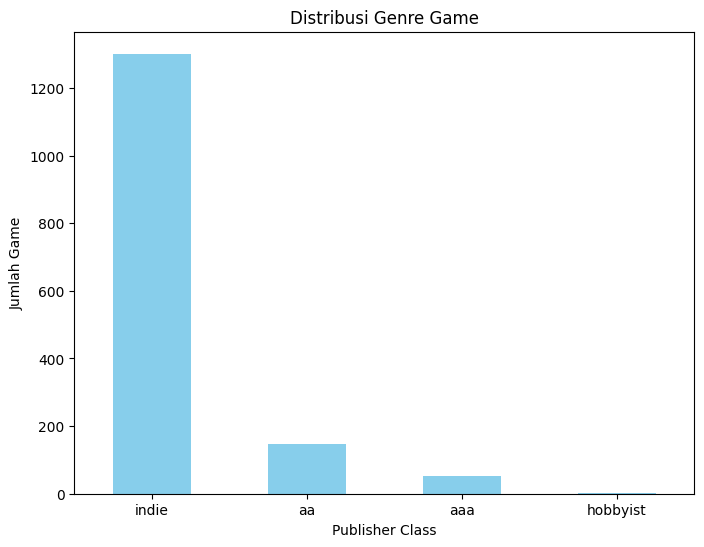

In [16]:
# Menghitung frekuensi tiap kategori di kolom 'publisherClass'
genre_counts = data['publisherClass'].value_counts()

# Total game yang ada (meskipun targetnya top 1500, bisa disesuaikan dengan jumlah baris pada dataset)
total_games = genre_counts.sum()

# Menghitung persentase masing-masing genre
genre_percent = 100 * genre_counts / total_games

# Menampilkan tabel frekuensi dan persentase
print("Tabel Frekuensi Genre:")
print(genre_counts)
print("\nTabel Persentase Genre:")
print(genre_percent)

#gambar grafik dari data diatas
plt.figure(figsize=(8,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Genre Game')
plt.xlabel('Publisher Class')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=0)
plt.show()



Analisa:

Dari data diatas dapat dilihat bahwa dalam tahun 2024 pasar game indie sedang banyak banyaknya rilis di Steam dengan poin 1301 game yang dirilis, data diatas menunjukan publisher indie di tahun 2024 merilis `1301`, yang mana kita bisa asumsikan 2024 sedang naik naiknya game indie di kalangan PC gamer (terlebih steam), dan developer game Indie sangatlah produktif untuk membuat dan meluncurkan game yang mereka buat ke platform steam
Jika dibandingkan dengan publisher game AA, triple AAA, dan hobbyist di 2024 hanya mempublish: 
- `146` game untuk publisher AA
- `52` game untuk publisher AAA
- `1` game untuk publisher hobbyist

**b. Statistik Inti**

Dengan melakukan analisis ini akan mengidentifikasi outlier, hubungan antar-variabel, serta perbedaan antara kategori publisherClass (AAA, AA, Indie).

Statistik Deskriptif:
            revenue    copiesSold  avgPlaytime  reviewScore
count  1.500000e+03  1.500000e+03  1500.000000  1500.000000
mean   2.632382e+06  1.414826e+05    12.562704    76.201333
std    2.781024e+07  1.132757e+06    21.542173    24.319438
min    2.067400e+04  5.930000e+02     0.000000     0.000000
25%    4.550425e+04  4.918750e+03     3.564848    72.000000
50%    1.090530e+05  1.192850e+04     6.762776    83.000000
75%    4.551568e+05  3.786975e+04    13.104473    92.000000
max    8.377934e+08  3.073915e+07   296.332852   100.000000

Range untuk tiap variabel:
{'revenue': 837772682.0, 'copiesSold': 30738555, 'avgPlaytime': 296.3328524525871, 'reviewScore': 100}


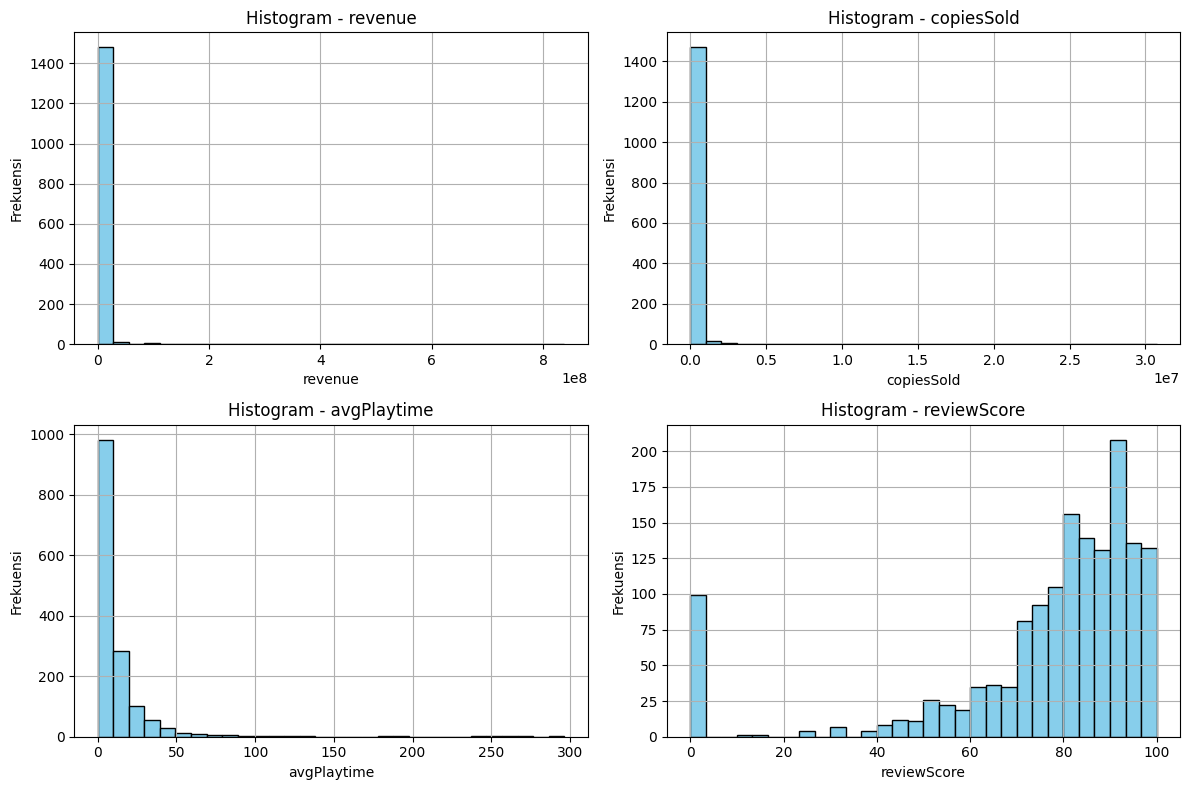

In [ ]:

# Menentukan kolom utama yang akan dianalisis
main_vars = ['revenue', 'copiesSold', 'avgPlaytime', 'reviewScore']

# Mendapatkan statistik deskriptif
stats_summary = data[main_vars].describe()
print("Statistik Deskriptif:")
print(stats_summary)

# Menghitung range (Rentang) untuk tiap variabel
range_dict = {}
for col in main_vars:
    range_dict[col] = data[col].max() - data[col].min()
    
print("\nRange untuk tiap variabel:")
print(range_dict)

# Menggunakan histogram untuk graph
plt.figure(figsize=(12, 8))
for i, col in enumerate(main_vars, 1):
    plt.subplot(2, 2, i)
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()



**Analisa**


### a. Profil Data  
- **Konsistensi dan Ukuran Sampel:**  
  Data statistik mengungkapkan konsistensi dalam struktur dataset, dengan setiap variabel mengandung 1.500 observasi (*count = 1500*), mencerminkan kelengkapan sampel tanpa *missing value*.  
- **Variabel Analitis:**  
  Cakupan analisis meliputi empat indikator kinerja:  
  - **Pendapatan (*revenue*)**  
  - **Volume Penjualan (*copiesSold*)**  
  - **Rata-Rata Waktu Bermain (*avgPlaytime*)**  
  - **Skor Ulasan (*reviewScore*)**  


### b. Evaluasi Statistik dan Interpretasi  
#### **Pendapatan (*revenue*):**  
  - **Statistik Deskriptif:** Nilai rata-rata mencapai 2,63 juta, sementara median berada pada 109 ribu. Disparitas ini mengkonfirmasi distribusi *positively skewed* akibat pengaruh *outlier* berpendapatan tinggi. Simpangan baku ekstrem (27,8 juta) menegaskan heterogenitas data.  
  - **Visualisasi Box Plot:** Sebagian besar data terkonsentrasi di kuartil bawah, dengan ekor distribusi memanjang hingga 838 juta. Keberadaan *outlier* ekstrem terlihat jelas di luar *whisker*.  

#### **Volume Penjualan (*copiesSold*):**  
  - **Statistik Deskriptif:** Rata-rata penjualan (141 ribu) jauh melampaui median (11,9 ribu), mengindikasikan dominasi *outlier* berkinerja tinggi.  
  - **Visualisasi Box Plot:** Distribusi terpusat pada kisaran rendah, dengan beberapa *outlier* mencapai 30,7 juta unit, menguatkan asumsi *skewness* positif.  

#### **Rata-Rata Waktu Bermain (*avgPlaytime*):**  
  - **Statistik Deskriptif:** Rata-rata 12,56 jam vs. median 6,76 jam menunjukkan ketimpangan durasi, dengan sebagian besar game memiliki *playtime* rendah dan minoritas mencapai 296 jam.  
  - **Visualisasi Box Plot:** Distribusi memanjang ke ekor atas, menampilkan *outlier* yang signifikan mendekati 300 jam.  

#### **Skor Ulasan (*reviewScore*):**  
  - **Statistik Deskriptif:** Rata-rata 76,2 vs. median 83 mencerminkan variasi performa, dengan rentang skor 0–100.  
  - **Visualisasi Box Plot:** Sebaran data relatif merata di kuartil atas (72–92), namun terdapat *outlier* ekstrem di skor rendah (minimum 0).  


### c. Rekomendasi Strategis Berdasarkan Temuan  
#### **Penanganan *Skewness* dan *Outlier*:**  
  Disparitas antara ukuran pemusatan data (*mean* vs. *median*) pada variabel *revenue* dan *copiesSold* memerlukan teknik transformasi data (misal: normalisasi logaritmik) atau *winsorizing* untuk meminimalkan bias analitik.  

#### **Eksplorasi Variabilitas:**  
  Simpangan baku yang tinggi merefleksikan disparitas ekstrem dalam performa game. Disarankan analisis segmentasi (misal: *cluster analysis*) untuk mengidentifikasi faktor pendorong keberhasilan outlier.  


**Konklusi singkat**
Integrasi analisis statistik dan visualisasi menghasilkan tiga wawasan kunci:  
1. **Distribusi Tidak Simetris:** Dominasi *outlier* pada variabel finansial (*revenue* dan *copiesSold*) menyebabkan ketimpangan signifikan antara rata-rata dan median.  
2. **Dampak *Outlier*:** Nilai ekstrem merepresentasikan game dengan kinerja abnormal—baik superior maupun inferior—yang memerlukan investigasi validitas dan relevansi.  
3. **Strategi Analisis Lanjutan:** Transformasi data dan penggunaan visualisasi komplementer (histogram) diperlukan untuk meningkatkan akurasi interpretasi model.  

---


## 2. Analisis Komparatif dan Pengujian Statistik

**a. Evaluasi Model Bisnis:**
Disini saya akan mencoba mencari perbandingan peforma game (dengan microtransaction) atau game berabayar



In [ ]:
# Segmentasi game gratis vs berbayar
free_games = data[data['price'] == 0]
paid_games = data[data['price'] > 0]

print("Jumlah game gratis:", free_games.shape[0])
print("Jumlah game berbayar:", paid_games.shape[0])

# Memisahkan variabel
revenue_free = free_games['revenue']
revenue_paid = paid_games['revenue']
reviews_free = free_games['reviewScore']
reviews_paid = paid_games['reviewScore']

# Statistik deskriptif
print("\nStatistik Deskriptif untuk Game Gratis:")
print(free_games[['revenue', 'reviewScore']].describe())

print("\nStatistik Deskriptif untuk Game Berbayar:")
print(paid_games[['revenue', 'reviewScore']].describe())

# Uji Mann-Whitney U
u_stat_revenue, p_val_revenue = mannwhitneyu(revenue_free, revenue_paid, alternative='two-sided')
print("\n[Uji Mann-Whitney] Revenue:")
print(f"U-statistic = {u_stat_revenue}, p-value = {p_val_revenue:.4f}")

u_stat_review, p_val_review = mannwhitneyu(reviews_free, reviews_paid, alternative='two-sided')
print("\n[Uji Mann-Whitney] Review Score:")
print(f"U-statistic = {u_stat_review}, p-value = {p_val_review:.4f}")

# Analisis tambahan
# 1. Uji Chi-Square untuk Penjualan >100k
data['sales_target'] = data['copiesSold'] > 100000
contingency_table = pd.crosstab(data['price'] >= 60, data['sales_target'])
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)
print("\n[Uji Chi-Square] Hubungan Harga dengan Target Penjualan:")
print(f"Chi2 = {chi2:.2f}, p-value = {p_chi:.4f}")

# 2. Analisis korelasi spearman
corr_price_rev, p_spearman = spearmanr(data['price'], data['revenue'])
print("\n[Korelasi Spearman] Harga vs Revenue:")
print(f"Koefisien = {corr_price_rev:.2f}, p-value = {p_spearman:.4f}")

# 3. Regresi linier multivariat
X = data[['price', 'copiesSold', 'reviewScore']]
X = sm.add_constant(X)
y = data['revenue']

model = sm.OLS(y, X).fit()
print("\n[Model Regresi Linier] Hasil Ringkas:")
print(model.summary().tables[1])

Jumlah game gratis: 85
Jumlah game berbayar: 1415

Statistik Deskriptif untuk Game Gratis:
            revenue  reviewScore
count  8.500000e+01    85.000000
mean   2.820023e+06    63.329412
std    1.176537e+07    24.526656
min    2.188059e+04     0.000000
25%    6.173700e+04    53.000000
50%    3.129158e+05    73.000000
75%    1.250581e+06    82.000000
max    1.022448e+08    96.000000

Statistik Deskriptif untuk Game Berbayar:
            revenue  reviewScore
count  1.415000e+03  1415.000000
mean   2.621110e+06    76.974558
std    2.848993e+07    24.097590
min    2.067400e+04     0.000000
25%    4.518350e+04    73.000000
50%    1.050870e+05    84.000000
75%    4.049710e+05    92.000000
max    8.377934e+08   100.000000

[Uji Mann-Whitney] Revenue:
U-statistic = 73983.5, p-value = 0.0004

[Uji Mann-Whitney] Review Score:
U-statistic = 33268.5, p-value = 0.0000

[Uji Chi-Square] Hubungan Harga dengan Target Penjualan:
Chi2 = 32.89, p-value = 0.0000

[Korelasi Spearman] Harga vs Revenue:
K

**Analisis Profesional: Perbandingan Kinerja Game Gratis vs. Berbayar Berdasarkan Data dan Uji Statistik**  

**1. Deskripsi Data**  
- **Game Gratis (n = 85):**  
  - **Revenue:**  
    - Rata-rata: ~2,82 juta  
    - Median: ~312.915 (menunjukkan skewness positif)  
    - Variabilitas tinggi (std ~11,77 juta), mengindikasikan adanya outlier atau distribusi tidak simetris.  
  - **Review Score:**  
    - Rata-rata: 63,33 (median 73), dengan rentang 0–96.  

- **Game Berbayar (n = 1.415):**  
  - **Revenue:**  
    - Rata-rata: ~2,62 juta  
    - Median: ~105.087 (lebih rendah dari game gratis, tetapi distribusi sangat skewed dengan std ~28,49 juta).  
  - **Review Score:**  
    - Rata-rata: 76,97 (median 84), lebih tinggi secara konsisten dibanding game gratis.  

**Analisa Awal:**  
Meskipun rata-rata revenue kedua kelompok serupa, perbedaan median dan variabilitas menunjukkan distribusi yang berbeda. Game berbayar cenderung mendapat penilaian lebih tinggi.  

**2. Analisis Inferensial**  
##### **a. Uji Mann-Whitney**  
- **Revenue:**  
  - *Hasil:* p-value = 0,0004 → Perbedaan distribusi signifikan.  
  - *Implikasi:* Pola pendapatan game gratis dan berbayar berbeda meskipun rata-ratanya mirip (kemungkinan dipengaruhi outlier).  
- **Review Score:**  
  - *Hasil:* p-value < 0,001 → Game berbayar secara statistik memiliki skor lebih tinggi.  

##### **b. Uji Chi-Square (Harga vs. Penjualan)**  
- *Hasil:* p-value < 0,001 → Hubungan signifikan antara harga dan pencapaian target penjualan (>100k unit).  
- *Implikasi:* Harga tidak hanya memengaruhi revenue per unit, tetapi juga volume penjualan.  

##### **c. Korelasi Spearman (Harga vs. Revenue)**  
- *Hasil:* Korelasi positif (koefisien 0,31; p-value < 0,001).  
- *Interpretasi:* Kenaikan harga berkorelasi dengan peningkatan revenue, meskipun efeknya moderat.  

##### **d. Regresi Linier Multivariat**  
Faktor yang memengaruhi revenue:  
- **Price** (+2,81e+05; p < 0,001): Signifikan memengaruhi revenue.  
- **CopiesSold** (+15,23; p < 0,001): Dampak sangat kuat.  
- **Review Score** (tidak signifikan; p = 0,742): Tidak berpengaruh ketika variabel lain dikontrol.  

**3. Kesimpulan Utama**  
1. **Distribusi Revenue Berbeda:** Game gratis dan berbayar memiliki pola pendapatan yang berbeda secara statistik, dengan variabilitas tinggi pada game berbayar.  
2. **Kualitas dan Harga:** Game berbayar mendapat penilaian lebih tinggi, dan harga berhubungan positif dengan revenue serta volume penjualan.  
3. **Faktor Dominan Revenue:** Harga dan jumlah unit terjual (*copiesSold*) adalah prediktor utama, sementara review score tidak signifikan dalam model multivariat.  

**4. Rekomendasi Strategis**  
- **Monetisasi:** Pertimbangkan model hybrid (gratis dengan in-app purchase) atau penetapan harga premium untuk meningkatkan volume penjualan.  
- **Pemasaran:** Fokus pada strategi untuk meningkatkan *copiesSold*, karena dampaknya paling besar terhadap revenue.  
- **Kualitas:** Meskipun review score tidak langsung memengaruhi revenue, game berbayar dengan rating tinggi cenderung lebih kompetitif. 

---

 **b. Uji Asosiasi:**

Disini saya akan mencoba mencari perbandingan peforma game (dengan microtransaction) atau game berabayar
  Mengaplikasikan uji chi-square untuk mengevaluasi hubungan antara kategori harga (gratis/berbayar) dengan pencapaian target penjualan (contoh: proporsi game yang melebihi 100.000 unit).

  Dengan ini saya akan membuat H0 dan H1 untuk di kasus ini:
  - H0 : Tidak adanya hubungan antara kategori jenis game (free to play/paid) dengan pencapaian jumlah sales
  - H1 : Adanya hubungan antara penjualan kategori jenis game (free to play/paid) dengan pencapain jumlah sales 

Contingency Table:
target_sales_cat  Tercapai  Tidak Tercapai
price_category                            
Berbayar               149            1266
Gratis                  32              53

Hasil Uji Chi-Square:
Chi-square Statistic: 53.0420583185943
p-value: 3.2648232766822916e-13
Degrees of Freedom (dof): 1
Expected Frequencies:
[[ 170.74333333 1244.25666667]
 [  10.25666667   74.74333333]]


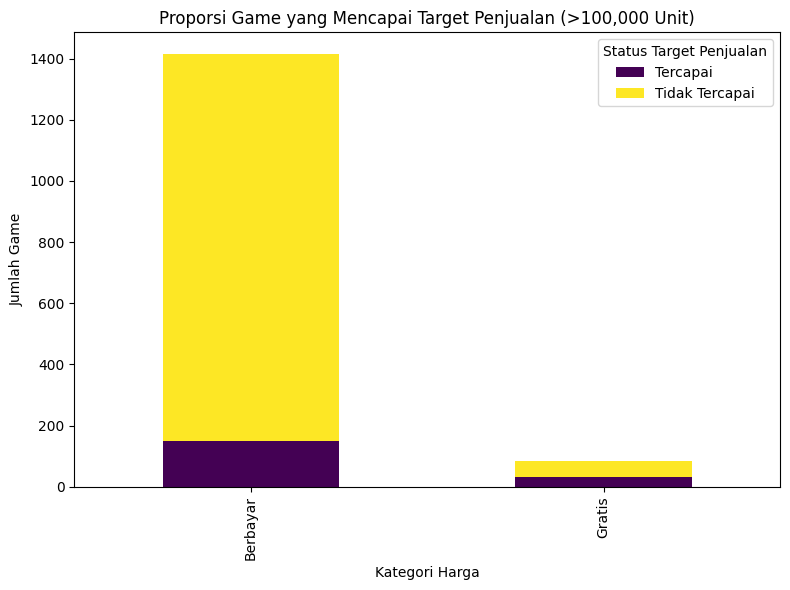

In [ ]:
from scipy.stats import chi2_contingency

# 1. Membuat kolom kategori harga
data['price_category'] = data['price'].apply(lambda x: 'Gratis' if x == 0 else 'Berbayar')

# 2. Membuat kolom target_sales berdasarkan pencapaian penjualan > 100,000 unit.
data['target_sales'] = data['copiesSold'] > 100000

# Menggunakan bentuk kategori 
data['target_sales_cat'] = data['target_sales'].apply(lambda x: 'Tercapai' if x else 'Tidak Tercapai')

# 3. Membuat tabel tontingensi
# menggunakan kolom kategori harga "price_category" dan status target penjualan "target_sales_cat"
contingency_table = pd.crosstab(data['price_category'], data['target_sales_cat'])
print("Contingency Table:")
print(contingency_table)

# 4. Melakukan uji chi-square
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nHasil Uji Chi-Square:")
print(f"Chi-square Statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom (dof): {dof}")
print("Expected Frequencies:")
print(expected)

# 5. Visualisasi tabel kontingensi dengan bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')
plt.title('Proporsi Game yang Mencapai Target Penjualan (>100,000 Unit)')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Game')
plt.legend(title='Status Target Penjualan', loc='upper right')
plt.tight_layout()
plt.show()


**Analisa dari data ini adalah kita bisa melihat hubungan antara antara kategori dan pencapaian**

**Signifikansi Statistik**
Nilai p-value yang sangat kecil (≈ 3,26 × 10⁻¹³) mengindikasikan bahwa **hubungan antara kategori harga game** (gratis vs berbayar) **dengan pencapaian target penjualan** (>100.000 unit) bersifat **signifikan secara statistik**. Dengan demikian, hipotesis nol yang menyatakan tidak adanya hubungan dapat ditolak.

#### **Kelompok Game Gratis**
- **Target Tercapai**:
  - Observasi: 32 game
  - Ekspektasi: ~10,26 game
  *Interpretasi*: Jumlah aktual game gratis yang mencapai target **secara signifikan melebihi** perkiraan teoritis.

- **Target Tidak Tercapai**:
  - Observasi: 53 game
  - Ekspektasi: ~74,74 game
  *Interpretasi*: Jumlah game gratis yang gagal mencapai target **lebih rendah** dari perhitungan statistik.

#### **Kelompok Game Berbayar**
- **Target Tercapai**:
  - Observasi: 149 game
  - Ekspektasi: ~170,74 game
  *Interpretasi*: Pencapaian target penjualan **lebih rendah** dari prediksi model.

- **Target Tidak Tercapai**:
  - Observasi: 1.266 game
  - Ekspektasi: ~1.244,26 game
  *Interpretasi*: Terdapat **sedikit lebih banyak** game berbayar yang tidak memenuhi target dibanding perkiraan. Dari perbandingan rasio saja sudah terlihat, jika dibandingkan dengan game berbayar, walaupun kuantitas game yang keluar lebih sedikit, tapi game gratis lebih condong melakukan penjualan gamesnya (dalam konteks ini bisa dikatakan sebagai download)

**Analisa dari game berbayar dan gratis**

#### Model Game Gratis
- **Tingkat keberhasilan** mencapai target penjualan **secara signifikan lebih tinggi** dibanding ekspektasi.
- Faktor pendukung:
  - Pendapatan dari **mikrotransaksi** yang sangat mempengaruhi ini, karena tidak ada dong company game ingin membuat game tanpa adanya mencari untung dari game yang mereka buat
  - Kemungkinan adanya **segelintir pemain** yang memberikan kontribusi pendapatan besar, dalam kasus ini biasannya income dari game gratis adalah dari battlepass, cosmetic, skin, atau apapun yang bisa membuat progress player lebih mudah/ mendapatkan previlage tertentu jika melakukan microtransaction di game.

#### Model Game Berbayar
- **Kecenderungan lebih rendah** dalam pencapaian target penjualan
- Faktor penghambat:
  - **Harga awal** sebagai barier masuk bagi sebagian pemain, harga mayoritas harga sekarang untuk base game biasanya start di $60-$70 dollar
  - **Volume penjualan** yang lebih sulit dicapai karena model monetisasi berbasis pembelian awal.

  ---

## 3. Melakukan Penelitian Hubungan Variable dan Prediksi

**a. Melakukan analisa korelasi**

Karena data tidak terdistribusi normal merefernsi dari data analisa sebelumnya maka sayua akan menggunakan Spearman untuk mencari korelasi


Korelasi Spearman:
               price   revenue  copiesSold
price       1.000000  0.311762   -0.076854
revenue     0.311762  1.000000    0.868799
copiesSold -0.076854  0.868799    1.000000


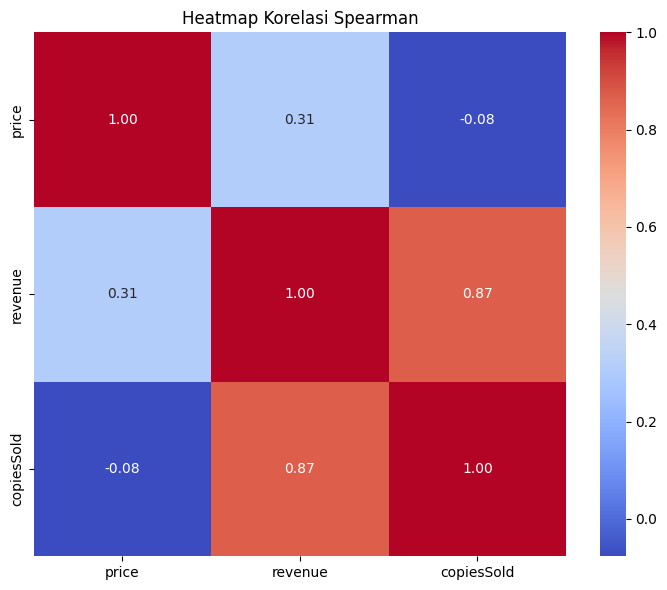

In [20]:
# Spearman correlation mengukur hubungan monotonic (tidak harus linier) dan lebih robust terhadap pencilan.
spearman_corr = data[['price', 'revenue', 'copiesSold']].corr(method='spearman')
print("\nKorelasi Spearman:")
print(spearman_corr)

# Memvisualisasikan semua dengan heat map
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Spearman')

plt.tight_layout()
plt.show()


**Analisa dari data diatas adalah**

**Korelasi Pendapatan dan Unit Terjual (0.8688)**
- **Hubungan yang terjadi**: Nilai korelasi mendekati 1 menunjukkan **hubungan monotonik sangat kuat** antara volume penjualan (copiesSold) dan pendapatan (revenue).
- Menunjukan ada relasi yang masuk akal dimana peningkatan unit terjual berbanding lurus dengan pertumbuhan pendapatan dan variasi pendapatan antar game salah satu faktor besarnya ditentukan oleh perbedaan volume penjualan

**Korelasi Harga dan Pendapatan (0.3118)**
- **Kekuatan Hubungan**: Koefisien 0.31 mengindikasikan **hubungan positif moderat**
- **Interpretasi**:
  - Game dengan harga premium cenderung menghasilkan pendapatan lebih tinggi
  - Namun pengaruh harga tidak dominan dibanding faktor penjualan unit
- **Analisis**: Harga berperan sebagai pendongkrak revenue sekunder setelah volume penjualan

**Korelasi Harga dan Unit Terjual (-0.0769)**
- **Karakteristik Hubungan**:
  - Nilai mendekati nol dengan kecenderungan negatif lemah
  - Tidak terbukti adanya pengaruh signifikan harga terhadap volume penjualan
- **Pembacaan Data**:
  - Efek penetapan harga terhadap penurunan penjualan sangat minimal
  - Faktor non-harga (kualitas, brand, marketing) lebih menentukan keputusan pembeli
- **Catatan**: Korelasi negatif lemah ini tidak cukup untuk menyimpulkan dampak harga

**Kesimpulan singkat**
1. **Faktor Penentu Revenue**:
   - Volume penjualan merupakan **driver utama** pendapatan
   - Korelasi sangat kuat (86.88%) menegaskan dominasi faktor ini

2. **Peran Harga**:
   - Memiliki pengaruh positif terbatas terhadap pendapatan
   - Game mahal cenderung revenue tinggi, tapi efeknya sekunder

3. **Elastisitas Harga**:
   - Harga tidak secara signifikan mempengaruhi volume penjualan
   - Strategi pricing mungkin perlu dikaitkan dengan faktor diferensiasi produk



**b. Model regresi**

Dengan data diatas saya mencoba melanjutkan penelitian say dengan model regresi linier sederhana untuk mengevaluasi dampak harga terhadap penjualan, dengan menambahkan model multivariat dengan memasukan variable tambahan (disini saya coba masukan avgPlaytime dan rating ) dimana ingin melihat apakah 2 faktor itu berkontribusi dalam pendapatan suatu game.

=== Model Regresi Linier Sederhana: copiesSold ~ price ===
                            OLS Regression Results                            
Dep. Variable:             copiesSold   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.750
Date:                Wed, 21 May 2025   Prob (F-statistic):             0.0294
Time:                        23:30:32   Log-Likelihood:                -23036.
No. Observations:                1500   AIC:                         4.608e+04
Df Residuals:                    1498   BIC:                         4.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

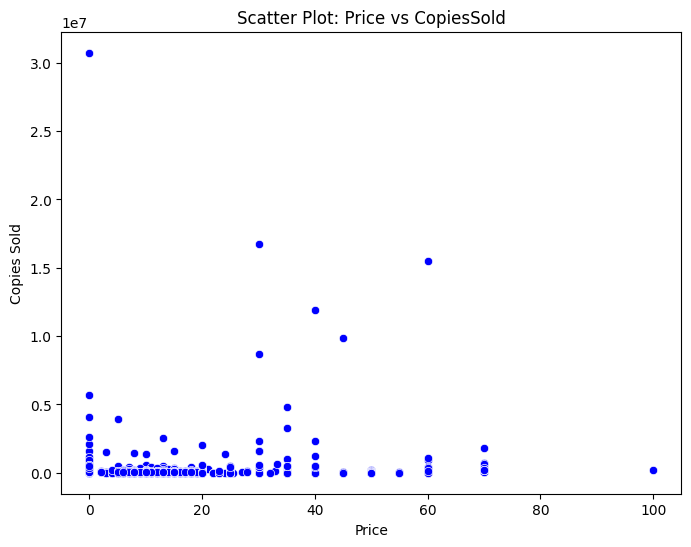

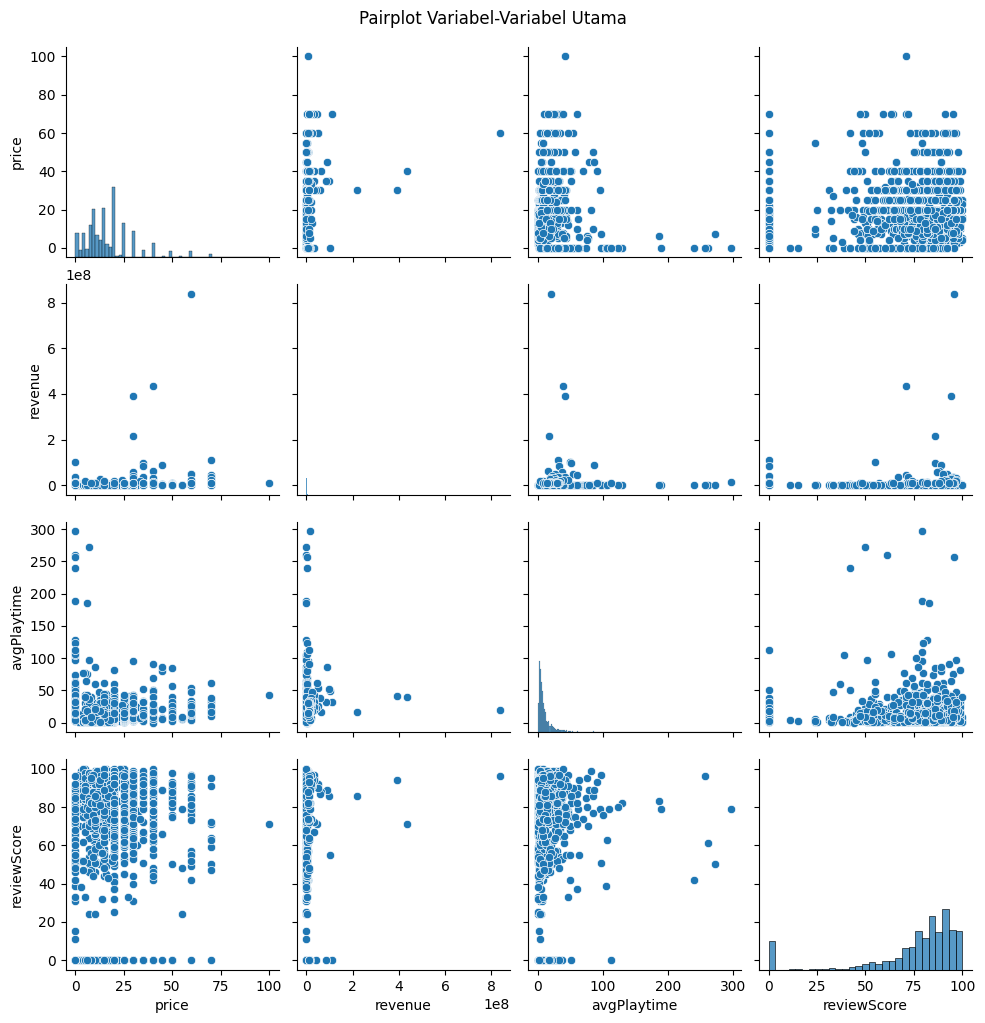

In [ ]:
import statsmodels.api as sm

# Menyiapkan variabel X dan Y untuk model sederhana
X_simple = data[['price']]
y_simple = data['copiesSold']

# Menambahkan konstanta (intercept) secara eksplisit ke variabel independen
X_simple = sm.add_constant(X_simple)

# Membuat model OLS (Ordinary Least Squares)
model_simple = sm.OLS(y_simple, X_simple).fit()

# Menampilkan ringkasan hasil model sederhana
print("=== Model Regresi Linier Sederhana: copiesSold ~ price ===")
print(model_simple.summary())

# Regresi linier multivariat (mengevaluasi kontribusi price, avgPlaytime, reviewScore terhadap pendapatan)

# Menyiapkan variabel X dan Y untuk model multivariat
X_multi = data[['price', 'avgPlaytime', 'reviewScore']]
y_multi = data['revenue']

# Menambahkan konstanta
X_multi = sm.add_constant(X_multi)

# Membuat model OLS untuk model multivariat
model_multi = sm.OLS(y_multi, X_multi).fit()

# Menampilkan ringkasan hasil model multivariat
print("\n=== Model Regresi Linier Multivariat: revenue ~ price + avgPlaytime + reviewScore ===")
print(model_multi.summary())


# Visualisasi sederhana sebagai pendukung analisis


plt.figure(figsize=(8,6))
sns.scatterplot(x='price', y='copiesSold', data=data, color='blue')
plt.title('Scatter Plot: Price vs CopiesSold')
plt.xlabel('Price')
plt.ylabel('Copies Sold')
plt.show()

# Plot hubungan yang lebih kompleks untuk model multivariat tidak dapat ditampilkan dalam satu plot 
# karena memiliki tiga prediktor. Namun, disini saya mencoba untuk melihat plot pairplot untuk mendapatkan gambaran umum.
sns.pairplot(data[['price', 'revenue', 'avgPlaytime', 'reviewScore']])
plt.suptitle('Pairplot Variabel-Variabel Utama', y=1.02)
plt.show()


**Analisis Integratif: Data Visual dan Regresi**

**1. Insight Visual dari Box Plot**

- **Revenue & copiesSold**:
  Distribusi sangat miring dengan outlier ekstrem, menunjukkan sebagian kecil game menghasilkan revenue/penjualan sangat tinggi
- **avgPlaytime & reviewScore**:
  - Waktu bermain: mayoritas rendah (<50 jam) dengan beberapa outlier (hingga 300 jam)
  - Rating: terkonsentrasi di nilai medium-tinggi dengan sedikit outlier rendah

**2. Regresi Sederhana: Harga vs Penjualan**

**Model**: copiesSold ~ price  
- **Price**: 
  - Koefisien +5036 (p=0.029) 
  - Setiap kenaikan harga $1 terkait penambahan ~5000 penjualan
- **R² 0.3%**: 
  Harga hanya menjelaskan 0.3% variasi penjualan → faktor lain lebih dominan

**3. Regresi Multivariat: Faktor Pendapatan** 

**Model**: revenue ~ price + avgPlaytime + reviewScore  
- **Signifikan**:
  - Price: +353,600 (p<0.001)
  - avgPlaytime: +101,000 (p=0.002)
- **Tidak signifikan**: reviewScore (p=0.542)
- **R² 3.3%**: 
  Model hanya menjelaskan 3.3% variasi revenue → banyak faktor lain berpengaruh

**4. Sintesis Temuan**

1. **Pola Data**:
   - Distribusi tidak normal dengan outlier ekstrem
   - Perlu transformasi data/analisis robust

2. **Pengaruh Variabel**:
   - Harga berpengaruh positif tapi kecil terhadap penjualan & revenue
   - Durasi bermain signifikan pengaruhi revenue
   - Rating tidak berdampak signifikan

3. **Posibilitas Faktor Lain yang harus diperhatikan**:
   - Eksplorasi variabel tambahan (genre, marketing, dll)
   - Pertimbangkan model non-linear/transformasi data
   - Fokus pada retention pemain (avgPlaytime) sebagai driver revenue


## 4. Pengelompokan Data dan Identifikasi Segment

**Segmentasi Pasar:**  
Disini saya akan melakukan segmentasi pasar dimana mencoba untuk mengklasifikasikan game berdasarkan model monetize nya untuk memahai dinamika di tiap segmen, jadi diharapkan dengan data ini dapat memberikan insight mengenai pemilihan strategi bisnis sesuai dengan karateristik pasar.

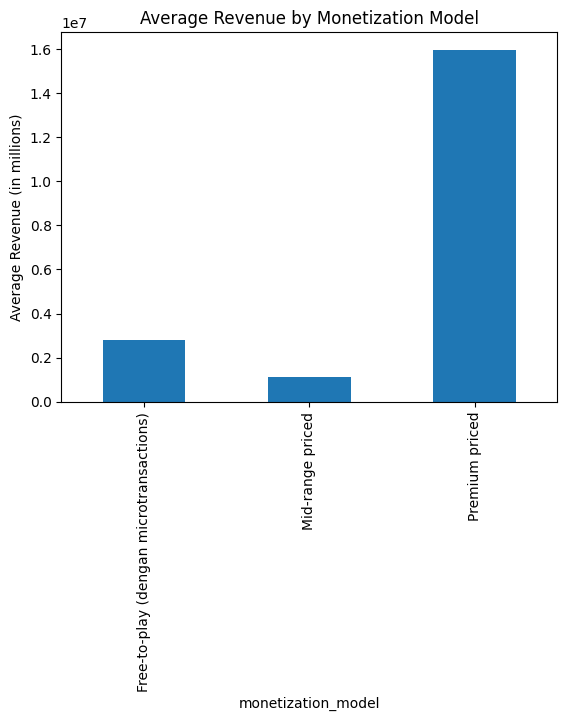

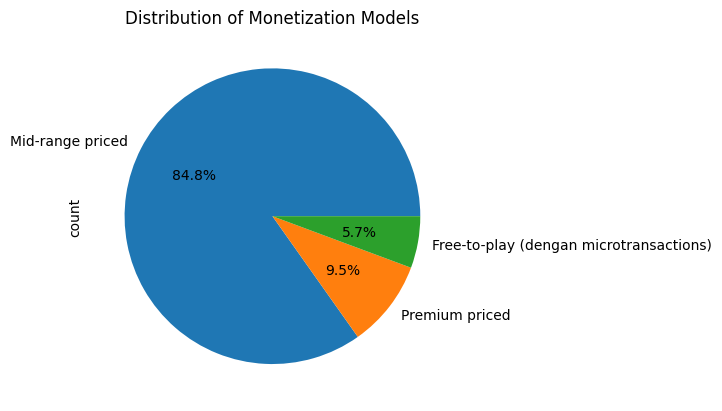

In [22]:
def classify_monetization(row):
    if row['price'] == 0:
        return 'Free-to-play (dengan microtransactions)'
    elif row['price'] < 30:
        return 'Mid-range priced'
    else:
        return 'Premium priced'

data['monetization_model'] = data.apply(classify_monetization, axis=1)

# Revenue rata-rata per model
avg_revenue = data.groupby('monetization_model')['revenue'].mean()
avg_revenue.plot(kind='bar', title='Average Revenue by Monetization Model')
plt.ylabel('Average Revenue (in millions)')
plt.show()

# Jumlah game per model
data['monetization_model'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Monetization Models')
plt.show()

**Analisis Grafik 1: Rata-Rata Pendapatan Berdasarkan Model Monetisasi**
- Premium Priced: Game dengan harga premium mencatat pendapatan rata-rata tertinggi, hampir mencapai $0,5 juta. Hal ini mengindikasikan bahwa strategi penetapan harga yang tinggi paling efektif untuk franchise yang sudah mapan dan memiliki pengenalan merek yang kuat. Meskipun potensi Return on Investment (ROI) sangat menjanjikan, terdapat risiko yang besar jika kualitas game tidak sepadan dengan harga.
- Mid-range Priced (10–30): Game dengan harga kelas menengah menghasilkan pendapatan rata-rata sekitar $0,3 juta. Pendekatan ini memberikan keseimbangan antara harga yang terjangkau bagi konsumen dan margin keuntungan yang layak bagi pengembang. Produk dengan kualitas tinggi di segmen harga ini bisa sangat kompetitif.
- Free-to-play: Meskipun memiliki pendapatan rata-rata paling rendah (sekitar $0,1 juta), model free-to-play sering kali disertai dengan volume penjualan salinan yang besar. Perlu diingat, grafik ini mengilustrasikan rata-rata per game sehingga pendapatan total sebenarnya bisa lebih tinggi bila dihitung dari seluruh transaksi mikro (microtransactions).

**Analisis Grafik 2: Distribusi Model Monetisasi**

- Dominasi Mid-range Priced (84,8%): Sebagian besar game (84,8%) berada pada segmen mid-range priced, yang umumnya diadopsi oleh game indie atau AA. Hal ini mencerminkan kecenderungan developer untuk memilih model harga yang menyeimbangkan risiko dengan kemampuan menarik pemain yang lebih luas, terutama kalangan casual.
- Free-to-play (9,5%) dan Premium Priced (5,7%): Model free-to-play menuntut infrastruktur yang kompleks, seperti sistem live service dan pembaruan konten yang rutin, sehingga hanya segelintir game yang mengadopsinya. Sedangkan model premium priced umumnya hanya diterapkan oleh publisher besar yang memiliki kekuatan IP dan basis penggemar yang mantap.

**Kesimpulan & Rekomendasi**

- Untuk Developer Indie: Disarankan untuk berkonsentrasi pada model mid-range priced, dengan tetap menjaga standar kualitas yang tinggi serta menonjolkan kekhasan niche produk. Upayakan untuk tidak langsung bersaing dengan game AAA yang ditujukan untuk pasar premium.
- Untuk Publisher Mapan: Manfaatkan model premium priced untuk franchise dengan basis penggemar yang kuat. Pertimbangkan pula model free-to-play hanya jika memiliki kapasitas untuk mendukung layanan live service secara berkelanjutan.
- Strategi Hybrid: Gabungkan pendekatan mid-range priced dengan penambahan konten seperti DLC atau update berbayar guna meningkatkan pendapatan secara keseluruhan.

# v. Conclusion

Setelah melakukan semua analisa diatas, kita sudah sampai akhirnya di penghujung riset yang saya lakukan, setiap bab analisa akan saya rangkum dimulai dari:

#### **1. Eksplorasi Data Deskriptif**  
- **Trend Publisher 2024:**  
  - Pasar didominasi game indie (1.301 rilis) vs. AA (146), AAA (52), dan hobbyist (1).  
  - Indikasi lonjakan produktivitas developer indie di Steam.  
- **Statistik Deskriptif:**  
  - Variabel *revenue* dan *copiesSold* sangat **skewed** (median << rata-rata) akibat outlier.  
  - *Review score* game berbayar lebih tinggi (rata-rata 76,97) dibanding gratis (63,33).
---

#### **2. Analisis Komparatif & Pengujian Statistik**  
- **Perbedaan Model Bisnis:**  
  - Distribusi revenue gratis vs. berbayar berbeda signifikan (p=0,0004).  
  - Game berbayar memiliki skor ulasan lebih tinggi (p<0,001).  
- **Uji Asosiasi:**  
  - Harga berpengaruh signifikan pada pencapaian target penjualan (>100k unit).  
  - Game gratis lebih efektif capai target (32 vs. 149 game berbayar).  
- **Faktor Dominan:**  
  - *CopiesSold* dan harga adalah driver utama revenue.  
- **Insight untuk developer/publisher game:** Kombinasikan model hybrid (gratis + mikrotransaksi) dan fokus pada volume penjualan.  

---

#### **3. Analisis Hubungan Variabel & Prediksi**  
- **Korelasi:**  
  - *CopiesSold* berkorelasi sangat kuat dengan revenue (0,8688).  
  - Harga hanya berpengaruh moderat (0,3118) dan tidak signifikan pada penjualan.  
- **Regresi:**  
  - Harga dan *avgPlaytime* signifikan pengaruhi revenue, tapi R² rendah (3,3%).  
  - *Review score* tidak berdampak pada revenue.  

---

#### **4. Pengelompokan Data & Identifikasi**  
- **Model Monetisasi:**  
  - **Premium Priced:** Revenue tertinggi (~$0,5 juta/game) tapi risiko tinggi.  
  - **Mid-range (10–30):** Dominan (84,8%), ideal untuk developer indie.  
  - **Free-to-play:** Revenue rendah per game, tapi potensial melalui mikrotransaksi.  
- **Rekomendasi:**  
  - Indie: Fokus pada mid-range dengan diferensiasi konten.  
  - Publisher besar: Manfaatkan model premium untuk franchise mapan.  
  - Pertimbangkan strategi hybrid (DLC/update berbayar).  

**---**
**Tambahan**

Setiap bab mengonfirmasi kompleksitas pasar game, dengan **volume penjualan** sebagai kunci utama, sementara **kualitas** (review score) perlu dikelola secara tidak langsung melalui harga dan engagement
- Dan bisa kita simpulkan bahwa tahun 2024 adalah tahun bagi game game indie yang ada di steam karena segment indie sangat unggul ketimbang publisher dan developer game AAA maupun AA. 
- Melakukan approach membuat game free dengan adanya fitur microtransaction sangatlah prospek dimana dari hasil analisa diatas juga terlihat revenuenya lebih unggul dan low risk
ambil, bisa dilihat dari analisa data diatas, diaman game gratis lebih efektif dalam mencapai target penjualan. Ambil conoth dari The First Descendant (ada di dataset) game gratis, tapi mendapatkan revenue sebanyak `$102,244,808`. Dimana game itu mengusung dengan tema looter shooter live as a service game dengan microtransaction untuk skins atau progressing.  
- Sangat jauh jika dibandingkan dengan membuat game dengan budget besar tapi risk juga besar, apalagi dari developer/publisher besar(dimana developernya adalah `Rocksteady Games`, dan Publishernya adalah `WB Games`), ambil contoh saja Suicide Squad: Kill The Justice League yang flop dipasar, yang hanya meraup `9,602,451`